In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import keras

Using TensorFlow backend.


In [3]:
keras.backend.backend()

'tensorflow'

In [4]:
from keras.datasets import fashion_mnist

In [5]:
(X_train, y_train),(X_test, y_test) = fashion_mnist.load_data()

In [7]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


<function matplotlib.pyplot.show(*args, **kw)>

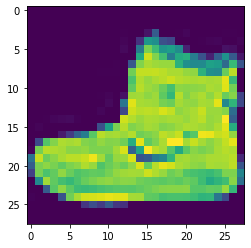

In [8]:
plt.imshow(X_train[0])
plt.show

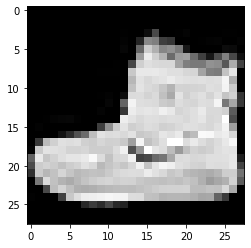

In [11]:
plt.imshow(X_train[0], cmap='gray')

In [12]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

# perform Normalization

In [15]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [16]:
X_train = X_train/255
X_test = X_test/255

In [17]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Activation,Flatten

In [19]:
model = Sequential()

model.add(Flatten(input_shape = [28,28]))

model.add(Dense(28, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 28)                21980     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                290       
Total params: 22,270
Trainable params: 22,270
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [21]:
model.fit(X_train, y_train,
         batch_size=16,
         epochs=2,
         verbose=2,
         validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
 - 11s - loss: 0.5184 - accuracy: 0.8196 - val_loss: 0.4393 - val_accuracy: 0.8473
Epoch 2/2
 - 9s - loss: 0.3976 - accuracy: 0.8585 - val_loss: 0.3988 - val_accuracy: 0.8597


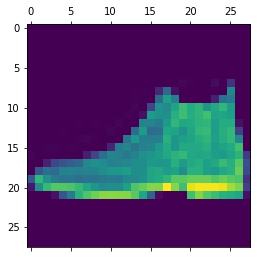

In [22]:
plt.matshow(X_test[0])

In [23]:
X_test.shape

(10000, 28, 28)

In [24]:
yp = model.predict(X_test)
yp[0]

array([1.1619763e-04, 1.0428471e-06, 1.3101951e-05, 7.5307366e-06,
       2.3835726e-06, 7.2466306e-02, 1.1172188e-04, 1.9696495e-02,
       4.1808773e-04, 9.0716714e-01], dtype=float32)

In [25]:
np.argmax(yp[0])

9

# Accuracy

In [26]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 40us/step


[0.39884623568058014, 0.8597000241279602]